In [307]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [256]:
list_beta=[1.05, 1.1, 1.2, 1.4, 1.6, 1.9, 2.3, 2.5, 3.0]

In [378]:
data={}
for beta in list_beta:
    data[beta]=np.loadtxt('instances_beta/beta%s/f_bands.dat'%str(beta))

In [390]:
th=3
x1={}
x2={}

for beta in list_beta:
    try:
        t0, x0 = np.where((data[beta]<=th)&(np.roll(data[beta],-5, axis=1)>=th))
        x1[beta]=x0[np.unique(t0, return_index=True)[1]]

        t0, x0 = np.where((data[beta]>=th)&(np.roll(data[beta],-5, axis=1)<th))
        x2[beta]=x0[np.unique(t0, return_index=True)[1]]
        
    except:
        print(beta)


In [391]:
avg_prof={}
for beta in list_beta:
    try:
        avg_prof[beta]=np.mean([np.roll(data[beta][t, :], 200-np.int64((x1[beta][t]+(x2[beta][t]+400*((x2[beta][t]<x1[beta][t]))))/2) ) for t in range(0, data[beta].shape[0])]
            , axis=0)
    except:
        print(beta)

1.05
1.1
1.2
1.4
3.0


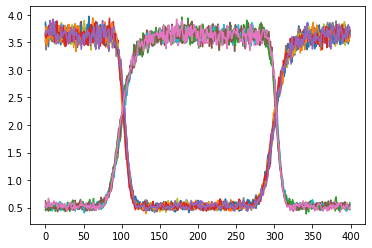

In [392]:
beta=2.5
for t in range(0, data[beta].shape[0], 1000):
    plt.plot(np.roll(data[beta][t, :], -np.int64((np.max([x2[beta][t],x1[beta][t]])+np.min([x2[beta][t],x1[beta][t]]))/2))) 

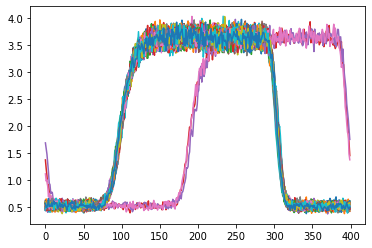

In [400]:
beta=2.5
for t in range(0, data[beta].shape[0], 200):
    plt.plot(np.roll(data[beta][t, :], 200-np.int64((x1[beta][t]+(x2[beta][t]+400*((x2[beta][t]<x1[beta][t]))))/2) ))

In [394]:
(x2[beta][t]<x1[beta][t])

True

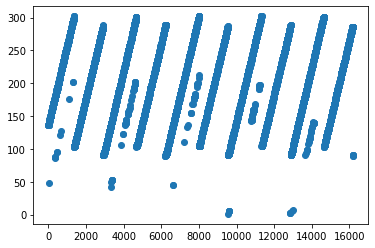

In [395]:
plt.plot(np.int64((x1[beta]+x2[beta])/2), 'o')

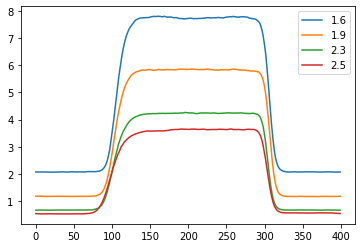

In [396]:
for beta in list_beta:
    try:
        plt.plot(avg_prof[beta], label=beta)
    except:
        pass
plt.legend()

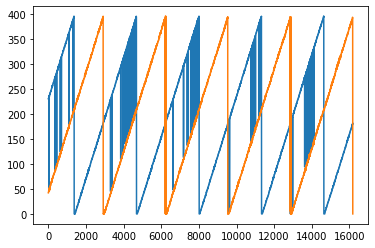

In [401]:
beta=2.5
plt.plot(x2[beta])
plt.plot(x1[beta])

In [416]:
rhol0={}
rhog0={}

for beta in list_beta:
    try:
        rhol0[beta]=np.mean(avg_prof[beta][150:250])
        rhog0[beta]=np.mean(np.roll(avg_prof[beta], 200)[150:250])
    except:
        pass
    

In [417]:
rhog0

{1.6: 2.070694233776387,
 1.9: 1.1718363419427285,
 2.3: 0.6662876323887222,
 2.5: 0.542978213248471}

In [411]:
rhog

array([18.38    , 11.61    ,  8.29    ,  5.116   ,  3.55    ,  2.65801 ,
        2.06682 ,  1.67889 ,  1.17204 ,  0.867676,  0.667091,  0.57    ,
        0.531   ,  0.309   ])

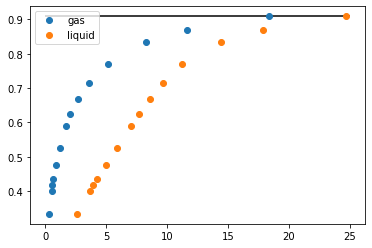

In [172]:
plt.plot(rhog, 1/diag[:,0], 'o', label='gas')
plt.plot(rhol, 1/diag[:,0], 'o', label='liquid')
plt.hlines(1/1.1, 0, 25)
plt.legend()

In [94]:
rhog, rhol = diag[:,1], diag[:,3]

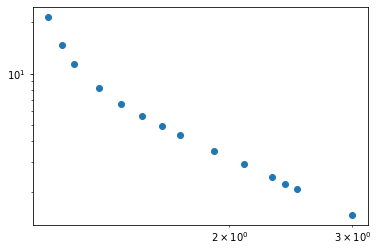

In [176]:
plt.loglog(diag[:,0], rhog+0.5*(rhol-rhog), 'o')

In [167]:
[(a,b) for a,b in zip(diag[0::2,0], (rhog+0.5*(rhol-rhog))[::2])]

[(1.1, 21.53585),
 (1.2, 11.361049999999999),
 (1.4, 6.60145),
 (1.6, 4.9011949999999995),
 (1.9, 3.522575),
 (2.3, 2.4504455),
 (2.5, 2.1005)]

In [177]:
1/0.95

1.0526315789473684

In [200]:
a, b = np.polyfit(np.log(diag[:3,0]), np.log(rhog+0.5*(rhol-rhog))[:3], 1)
a,b

(-7.358757181055872, 3.7538214990528345)

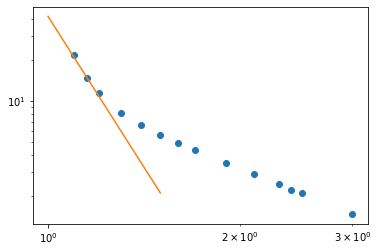

In [253]:
plt.loglog(diag[:,0], rhog+0.5*(rhol-rhog), 'o')
u=np.linspace(1, 1.5)
#plt.plot(np.exp(u), np.exp(a*u+b))

plt.plot(u, 11.1*b*(u**a))

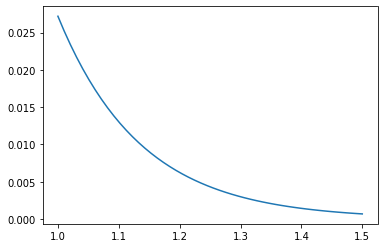

In [198]:
plt.plot(u, np.exp(a*u+b))

In [255]:
11.1*b*((1.05)**a)

29.098438847098336